In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [33]:
#data = sm.datasets.co2.load_pandas()
df = pd.DataFrame.from_records(sm.datasets.co2.load().data)
df['date'] = df.date.apply(lambda x: x.decode('utf-8'))
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.set_index('date')
#df.drop(['date'], axis=1, inplace=True)
#df.index
df1 = df['co2'].resample('MS').mean()
#df1.isnull().sum()
df1 = df1.fillna(df1.bfill())
#df1.isnull().sum()

0

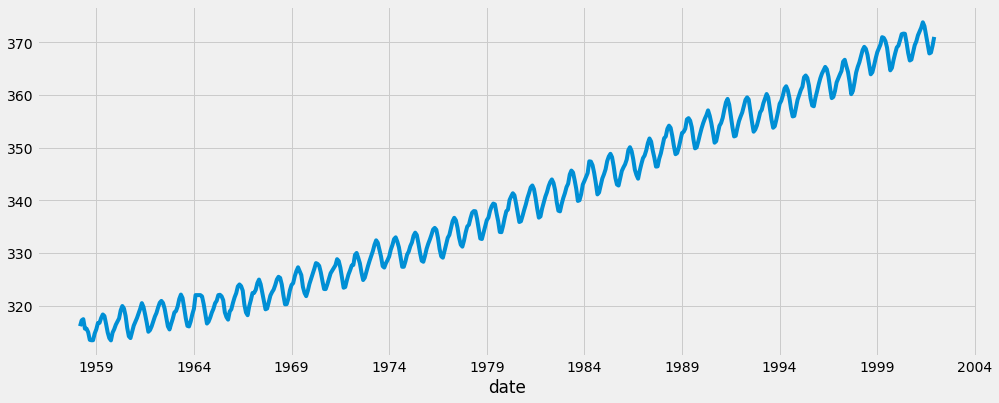

In [34]:
df1.plot(figsize=(15, 6))
plt.show()

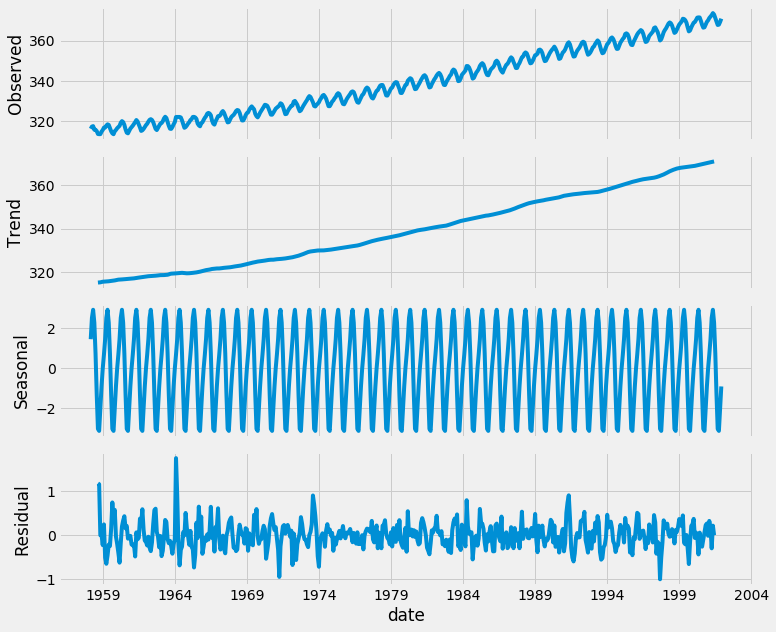

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

In [52]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [53]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624031752
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6027.256393081112
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763898
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1480.7910932051345
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1414.032574253477
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1049.188550965905
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1000.6304768404457
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878557033246
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1027.99162770365
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912998186
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:998.6335100481732
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1236.4167518164884
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1036.8731991666161
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1001.9764450937523
AR

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:274.42511000022694
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:803.8069508338053
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:471.4544527778001
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:328.3478001810605
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:432.5111182850152
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:276.9423137910013
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:276.9809613749171
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:357.7214994298906
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:280.9686406195864
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:276.9930100134291
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:646.9466850162605
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:406.42020685046424
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:353.83377824829415
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1404.245593671727
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1172.0800568110035
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1070.13473472731
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1103.0126459151052
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:783.0867946844328
ARIMA(

ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1055.3611933569898
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1007.2278566870162
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:581.9154274934448
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:300.71056547431726
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:274.53636554814517
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1049.4459152164288
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:570.3872897070663
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:348.59389678660943
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:581.6873692403276
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:328.5351742407733
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:271.1386891913603
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:432.70193110023706
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:281.98354276130465
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:275.23641884933346
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:776.8185162002007
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:464.12481296509793
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:328.6032334918443
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:422.0120477379335


ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:814.1201705606013
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:499.28522957487195
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:362.144270295764
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:448.35046290329603
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:297.9093349505165
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:297.33923727091366
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:381.88527611700306
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:300.9964136257997
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:298.1871284829608
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:665.2794069764509
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:434.7776501885789
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:384.66164931756254
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1256.7034969771566
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1052.9120795559998
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:928.6221060656515
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:569.7778177231413
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:299.5159698438277
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:280.7639392636394
ARIM

ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:836.3080664382232
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:569.1491462061952
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:298.3599831938142
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:273.7315380335471
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1056.245926804728
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:575.6750883540749
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:348.39103008713727
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:568.6802805609416
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:330.85082263850404
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:276.76713964289524
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:426.1422065102088
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:281.632836384829
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:273.4956807493636
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:780.3423097148042
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:475.36648046478274
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:329.3739903093613
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:426.11695071333895
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:277.3739642753476
ARIMA(

In [54]:
mod = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


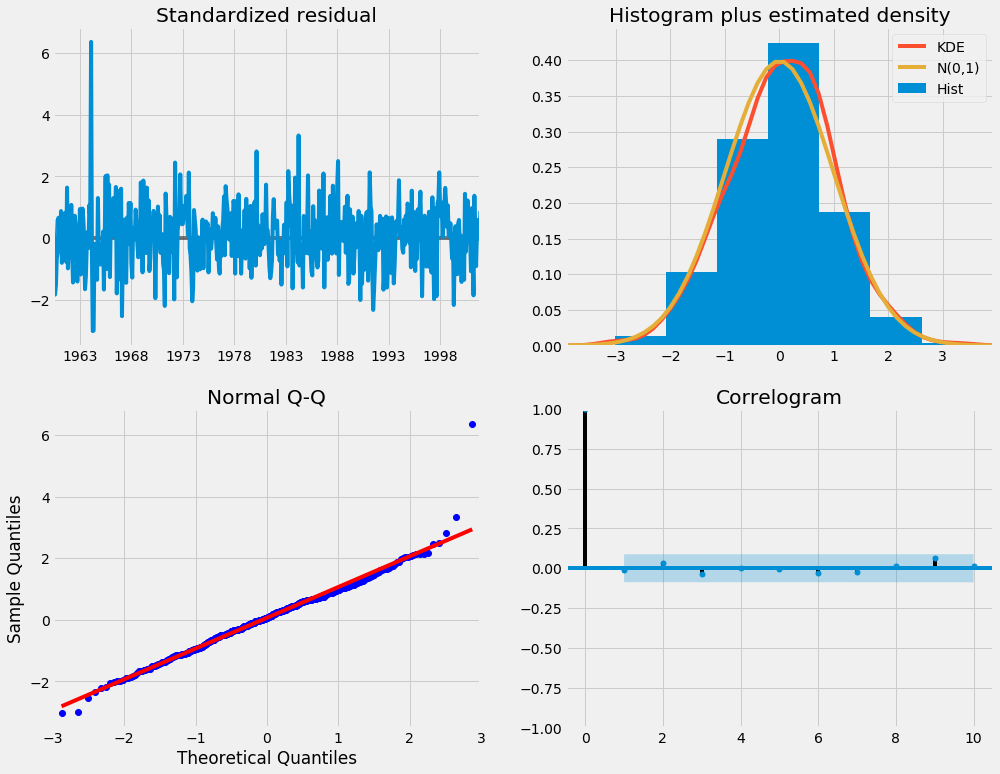

In [55]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

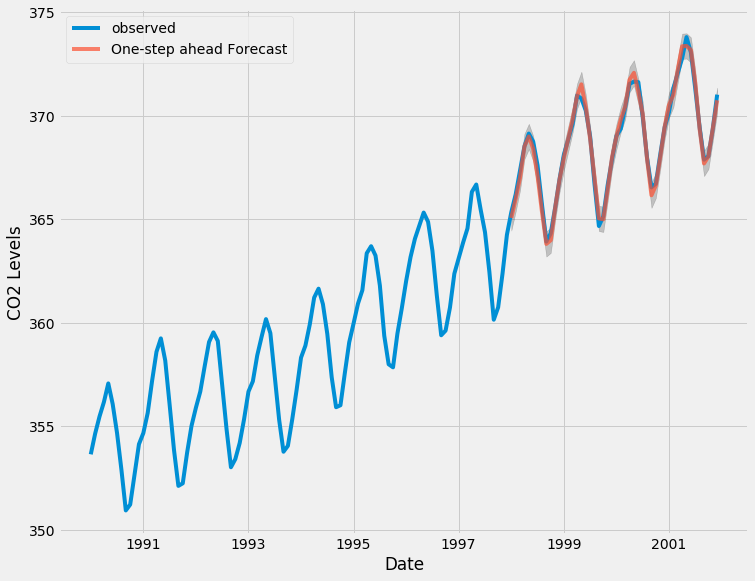

In [56]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

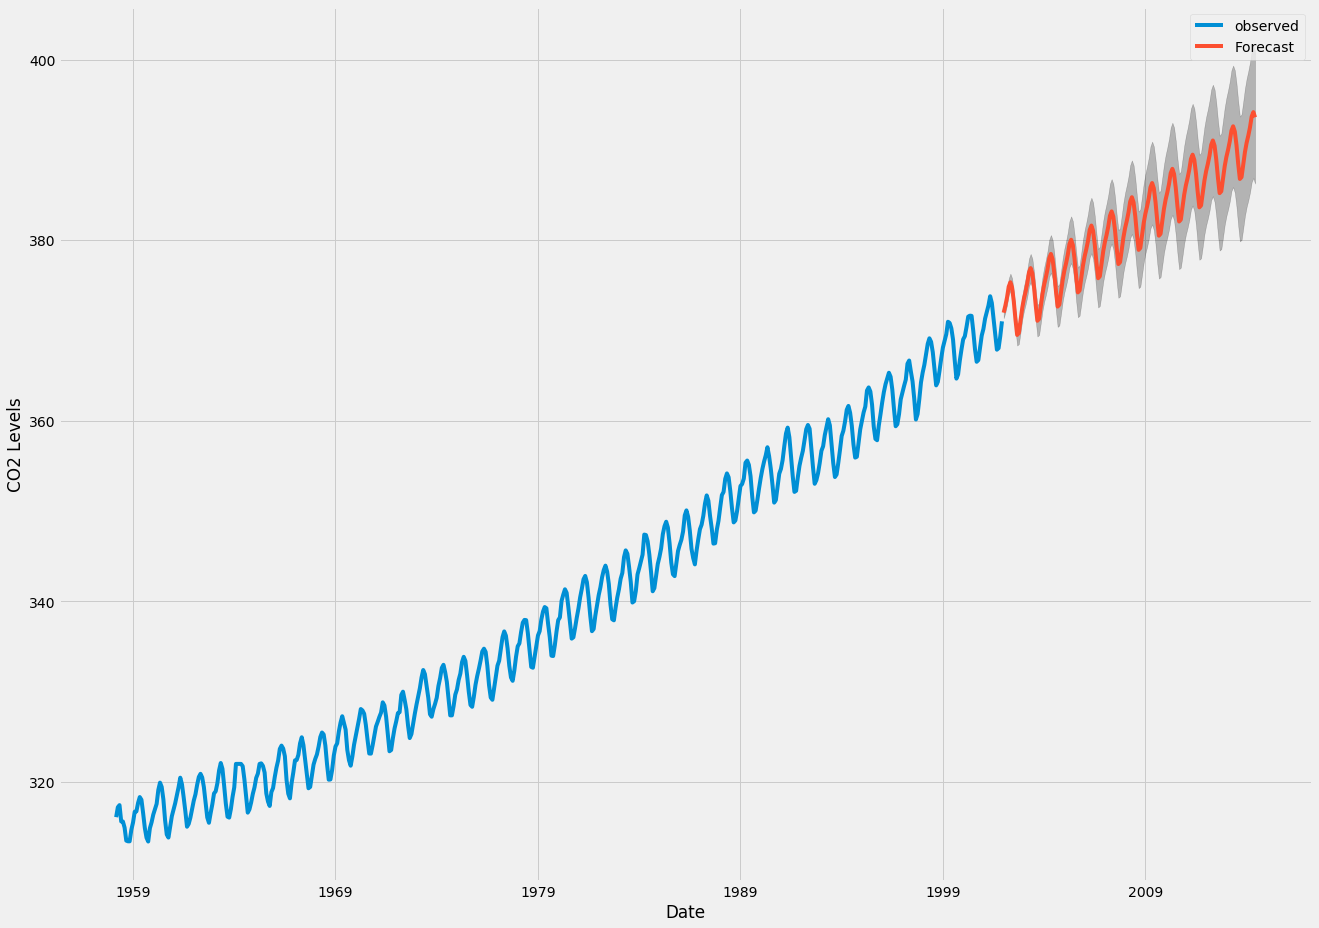

In [57]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=150)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = df1.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()